In [1]:
# Section 4: Linear Regression
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Video 14 - Making Predictions
# Example using gradient descent to declare a linear model and make predictions
#w = torch.tensor(random.uniform(0, 10), requires_grad=True) # weight, setting a random value
#b = torch.tensor(random.uniform(0, 10), requires_grad=True) # bias
w = torch.tensor(3.0, requires_grad=True) # weight, setting a random value
b = torch.tensor(1.0, requires_grad=True) # bias

In [3]:
# Defining function for input x
def forward(x):
    y = w*x + b # a simple linear model, will train along time to fit, x = input, y = prediction output
    return y

In [4]:
#x = torch.tensor(2)
x = torch.tensor([[2], [7]]) # if x has two inputs, n input values
forward(x)

tensor([[ 7.],
        [22.]], grad_fn=<AddBackward0>)

In [5]:
# Vid 15 - Linear Class
# Standardized way of creating linear class
from torch.nn import Linear

In [6]:
torch.manual_seed(1) # construct a seed to generate random numbers
model = Linear(in_features=1, out_features=1) # for every output, theres single input
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [8]:
# Vid 16 - Custom Modules
import torch.nn as nn

In [9]:
# creating new class
class LR(nn.Module):
    def __init__(self, input_size, output_size): # constructor to initialize new int
        super().__init__() # more freedom to initiate
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x) # a simple linear model, will train along time to fit, x = input, y = prediction output
        return y

In [10]:
torch.manual_seed(1)
model = LR(1, 1)

#print(model.parameters())
#print(list(model.parameters()))

x = torch.tensor([[1.0], [2.0]])
y = model.forward(x)
print(y)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


Text(0, 0.5, 'y')

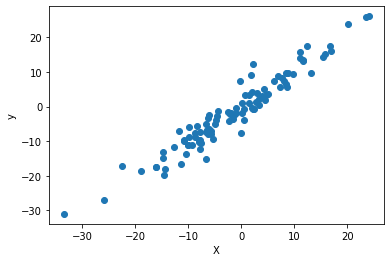

In [11]:
# Vid 17 - Creating Dataset
X = torch.randn(100, 1)*10 # creating a set of random integers
y = X + (3 * torch.randn(100, 1))
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')

In [12]:
# Set up weight and bias of our LR model
[w, b] = model.parameters()
#print(w, b)
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward>) tensor(-0.4414, grad_fn=<SelectBackward>)


In [13]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [14]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()    

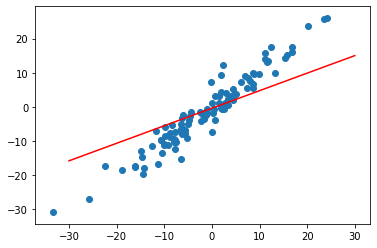

In [15]:
plot_fit('Initial model')

In [16]:
# Video 21 - Implement Gradient Descent
criterion = nn.MSELoss() # mean squared error loss
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # SGD equation 

In [17]:
epochs = 100
losses = []

# Need to fix - 09022020
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch: ", i, "loss: ", loss.item())
    
    losses.append(loss)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss:  36.448333740234375
epoch:  1 loss:  43.94552230834961
epoch:  2 loss:  53.461822509765625
epoch:  3 loss:  65.5404281616211
epoch:  4 loss:  80.87049865722656
epoch:  5 loss:  100.32696533203125
epoch:  6 loss:  125.01981353759766
epoch:  7 loss:  156.3577880859375
epoch:  8 loss:  196.12875366210938
epoch:  9 loss:  246.60142517089844
epoch:  10 loss:  310.6552429199219
epoch:  11 loss:  391.9435119628906
epoch:  12 loss:  495.1043395996094
epoch:  13 loss:  626.021240234375
epoch:  14 loss:  792.162109375
epoch:  15 loss:  1003.0047607421875
epoch:  16 loss:  1270.573974609375
epoch:  17 loss:  1610.131591796875
epoch:  18 loss:  2041.0472412109375
epoch:  19 loss:  2587.899169921875
epoch:  20 loss:  3281.88427734375
epoch:  21 loss:  4162.58251953125
epoch:  22 loss:  5280.22607421875
epoch:  23 loss:  6698.56982421875
epoch:  24 loss:  8498.5029296875
epoch:  25 loss:  10782.7236328125
epoch:  26 loss:  13681.5
epoch:  27 loss:  17360.189453125
epoch:  28 loss:  2

Text(0.5, 0, 'Epoch')

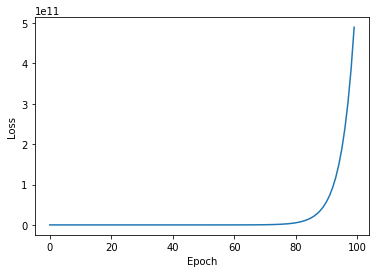

In [18]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

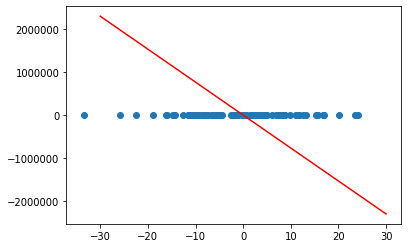

In [19]:
plot_fit("Trained Model")